## Derivatives exercises

#### Second order finite differences

To keep track of the error terms, write out the Taylor expansions up to the 4th order terms:

$$f(x+\Delta x) \approx f(x) + \Delta x {df\over dx} + {(\Delta x)^2\over 2}{d^2f\over dx^2} + {(\Delta x)^3\over 6}{d^3f\over dx^3} + {(\Delta x)^4\over 24}{d^4f\over dx^4}$$

$$f(x-\Delta x) \approx f(x) - \Delta x {df\over dx} + {(\Delta x)^2\over 2}{d^2f\over dx^2}-{(\Delta x)^3\over 6}{d^3f\over dx^3} + {(\Delta x)^4\over 24}{d^4f\over dx^4}$$

Then add and subtract:

$$f(x+\Delta x) + f(x-\Delta x) \approx 2f(x) + (\Delta x)^2{d^2f\over dx^2}  + {(\Delta x)^4\over 12}{d^4f\over dx^4}$$

$$f(x+\Delta x) - f(x-\Delta x) \approx 2\Delta x {df\over dx} + {(\Delta x)^3\over 3}{d^3f\over dx^3}$$

Therefore

$${d^2f\over dx^2}\approx {f(x+\Delta x) + f(x-\Delta x) -2f(x)\over (\Delta x)^2} - {(\Delta x)^2\over 12}{d^4f\over dx^4}$$

$${df\over dx} \approx {f(x+\Delta x) - f(x-\Delta x)\over 2\Delta x} - {(\Delta x)^2\over 6}{d^3f\over dx^3}$$

For comparison, the first order derivative with the error term kept in is

$${df\over dx} \approx {f(x+\Delta x) - f(x)\over \Delta x} - {\Delta x\over 2}{d^2f\over dx^2}$$



#### Optimal step size

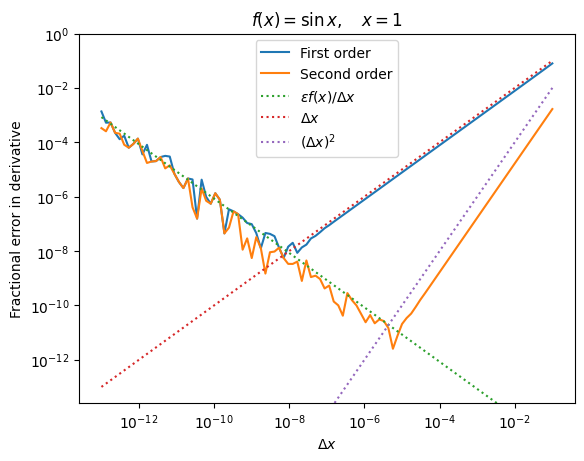

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

dx_vals = 10**np.linspace(-13, -1, 100)

x = 1.0 # Evaluate the derivatives at this value of x

err = np.zeros_like(dx_vals)   # to store the fractional error from the 1st order difference
err2 = np.zeros_like(dx_vals)  # same for the second order

for i, dx in enumerate(dx_vals):
    dfdx1 = (f(x + dx) - f(x)) / dx
    err[i] = np.abs((dfdx1 - np.cos(x))/np.cos(x))

    dfdx2 = (f(x + dx) - f(x - dx)) / (2*dx)
    err2[i] = np.abs((dfdx2 - np.cos(x))/np.cos(x))

# Plot the results
plt.plot(dx_vals, err, label="First order")
plt.plot(dx_vals, err2, label="Second order")

plt.ylim((1e-2*min(err2), 1.0))

# and the analytic expressions
plt.plot(dx_vals, 1e-16 * f(x) / dx_vals, ":", label=r'$\epsilon f(x)/\Delta x$')
plt.plot(dx_vals, dx_vals, ":", label=r'$\Delta x$')
plt.plot(dx_vals, dx_vals**2, ":", label=r'$(\Delta x)^2$')

plt.title(r'$f(x) = \sin x, \ \ \ x=%lg$' % (x,))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\Delta x$')
plt.ylabel('Fractional error in derivative')
plt.legend()
plt.show()

The optimal step size for the 1st order expression is $\sim \epsilon^{1/2}\sim 10^{-8}$ and the associated error is also $\sim \epsilon^{1/2}$. 

For the second order expression, the finite difference error is $\propto (\Delta x)^2$ rather than $\Delta x$. Following the same argument as for the first order derivative leads to an optimal step size of order $\epsilon^{1/3}\sim 10^{-16/3}\sim 10^{-5.3}$, and an error $\epsilon^{2/3}\sim 10^{-10.6}$.

Notice that a higher order derivative allows us to get a better error with a larger step size.

#### Automatic derivatives

Inspecting the code, we can see that the operators that are implemented inside the class return a new instance of Var that is initialized with (1) the value obtained from the operation, and (2) a set of children that give the partial derivatives with respect to the variables involved in the operation. 

The multiplication operator is instructive to look at. For the operation `x*y`, there are two variables `x` and `y`, so we need to return (1) the operation value `x*y`, (2) the partial derivative with respect to `x`, which is $\partial(xy)/\partial x = y$, and (3) the partial derivative with respect to `y`, which is $\partial(xy)/\partial y = x$. The corresponding function definition is

```
def __mul__(self, other):
        return Var(self.value * other.value, [(other.value, self), (self.value, other)])
```

For $exp(x)$, there is only one argument to the function so we just have to return one partial derivative $(\partial/\partial x)\exp(x) = \exp(x)$. So we can add 
```
def exp(self):
        return Var(math.exp(self.value), [(math.exp(self.value), self)])
```

which we use for example as 

`f= x * y + x.exp()`
